In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../Seed_Data.csv')
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [3]:
cov = np.cov(df.values.T)
cov

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

In [4]:
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

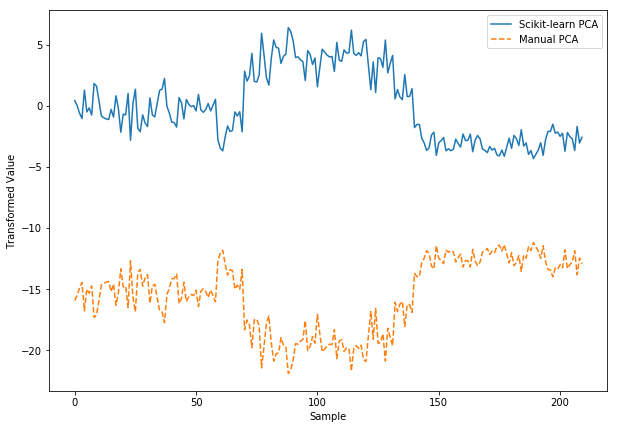

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

In [7]:
model.components_

array([[0.98965371, 0.14347657]])

In [8]:
P

array([-0.98965371, -0.14347657])

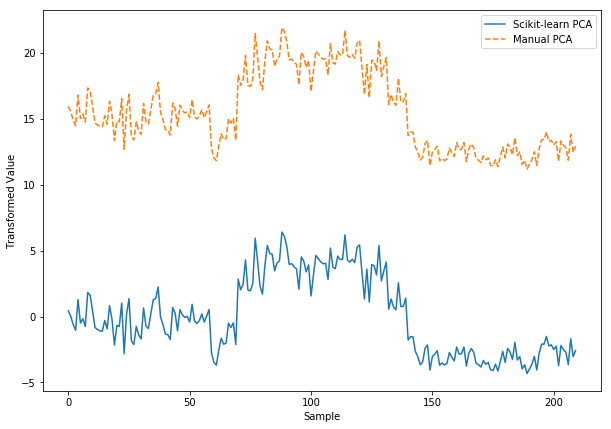

In [9]:
manual_pca *= -1
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

In [10]:
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

In [11]:
manual_pca *= -1

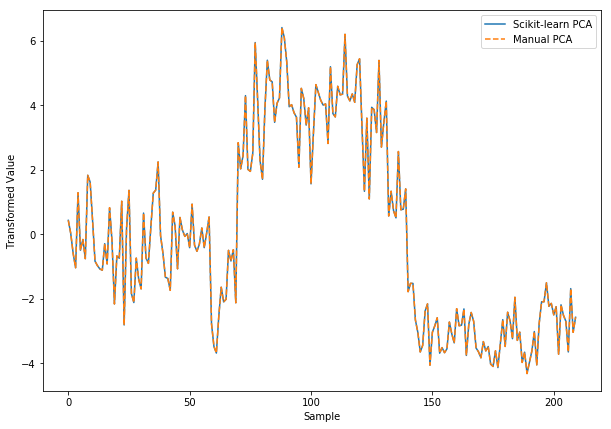

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

In [13]:
# Unit Test

In [14]:
import unittest
class TestPCAManual(unittest.TestCase):   
    
    def test_df_head(self):
        self.assertEqual(len(df.head()),5)   
        
    def test_cov(self):
        self.assertEqual(cov.size,4)
        
    def test_sklearn_pca(self):
        self.assertEqual(sklearn_pca.size,210)
        
    def test_manual_pca(self):
        self.assertEqual(manual_pca.size,210)

In [15]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestPCAManual)
unittest.TextTestRunner(verbosity=2).run(suite)

test_cov (__main__.TestPCAManual) ... ok
test_df_head (__main__.TestPCAManual) ... ok
test_manual_pca (__main__.TestPCAManual) ... ok
test_sklearn_pca (__main__.TestPCAManual) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.007s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>